<a href="https://colab.research.google.com/github/ankita9084/Malignant-Lymphoma-Classification/blob/main/LEUKEMIA_CLASSIFICATION_USING_VGG19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Libraries**

In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import Model 
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Dropout, Flatten,GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

# **Uploading Data via Kaggle Api**

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"dona8584","key":"ba95d52588c6e59458c84fcc7d68775a"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d dona8584/leukemia

 98% 121M/124M [00:03<00:00, 42.5MB/s]
100% 124M/124M [00:03<00:00, 37.9MB/s]


In [ ]:
from zipfile import ZipFile
file_name = "leukemia.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
IMAGE_SIZE = [224, 224]

In [ ]:
#Give dataset path
train_path = '/content/Leukemia'
#test_path = '/content/validation/validation'

In [ ]:
folders = glob('/content/Leukemia/*')
len(folders)

3

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# **Designing Our Model**

In [ ]:
InceptionResNetV2_model = tf.keras.applications.InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

80150528/80134624 [==============================] - 1s 0us/step


In [ ]:
from tensorflow.keras import Model 
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Dropout, Flatten,GlobalAveragePooling2D
from tensorflow.keras.models import Sequential

# The last 15 layers fine tune
for layer in vgg19_model.layers:
    layer.trainable = False

x = vgg19_model.output

x = Flatten()(x)

x = Dense(units=512, activation='relu')(x)

output  = Dense(len(folders), activation='softmax')(x)
model = Model(vgg19_model.input, output)


model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics= ['accuracy'])

# **Image Augmentation**

In [ ]:
# Use the Image Data Generator to import the images from the dataset

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   validation_split=0.2)  # val 20%

test_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
#no flip and zoom for test dataset

In [ ]:
# Make sure you provide the same target size as initialied for the image size

training_set = train_datagen.flow_from_directory('/content/Leukemia',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical',
                                                 subset='training')

Found 301 images belonging to 3 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/Leukemia',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical',
                                            subset='validation')

Found 73 images belonging to 3 classes.


# **Training Our Model**

In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/50
10/10 [==============================] - 26s 3s/step - loss: 0.7577 - accuracy: 0.6346 - val_loss: 1.0019 - val_accuracy: 0.4247
Epoch 2/50
10/10 [==============================] - 13s 1s/step - loss: 0.8037 - accuracy: 0.6179 - val_loss: 1.0508 - val_accuracy: 0.5479
Epoch 3/50
10/10 [==============================] - 13s 1s/step - loss: 0.9337 - accuracy: 0.5548 - val_loss: 2.0197 - val_accuracy: 0.4247
Epoch 4/50
10/10 [==============================] - 13s 1s/step - loss: 0.8583 - accuracy: 0.6279 - val_loss: 1.0591 - val_accuracy: 0.5479
Epoch 5/50
10/10 [==============================] - 13s 1s/step - loss: 0.7116 - accuracy: 0.6711 - val_loss: 0.9835 - val_accuracy: 0.5068
Epoch 6/50
10/10 [==============================] - 13s 1s/step - loss: 0.7236 - accuracy: 0.6678 - val_loss: 1.8497 - val_accuracy: 0.4384
Epoch 7/50
10/10 [==============================] - 15s 2s/step - loss: 0.8409 - accuracy: 0.6379 - val_loss: 1.7420 - val_accuracy: 0.5205
Epoch 8/50
10/10 [==

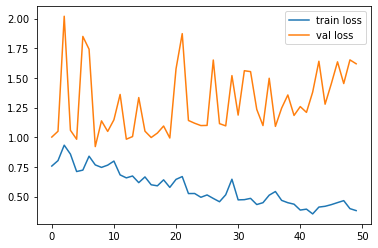

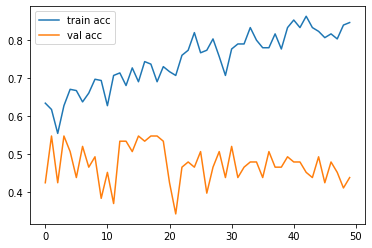

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
from tensorflow.keras.models import load_model

model.save('modelleukemia2.h5')

# **Making Predictions**

In [ ]:
y_pred = model.predict(test_set)

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2,
       2, 2, 0, 2, 0, 0, 0])

# **Make Predictions**

In [ ]:
classes = ["Chronic lymphocytic leukemia", "follicular lymphoma" , "mantle cell lymphoma" ]

In [ ]:
def predict_image(img):
    plt.figure(figsize=(40,8))
    print()
    print('----------------------------Leukemia Images--------------------------------')
    print()
    print('------------------------------------THE Given Image is----------------------------------------------------')
    print()
    x=image.img_to_array(img)
    x=x/255
    plt.imshow(img)
    x=np.expand_dims(x,axis=0)
    #img_data=preprocess_input(x)

    print(classes[np.argmax(model.predict(x))])


----------------------------Leukemia Images--------------------------------

------------------------------------THE Given Image is----------------------------------------------------

Chronic lymphocytic leukemia


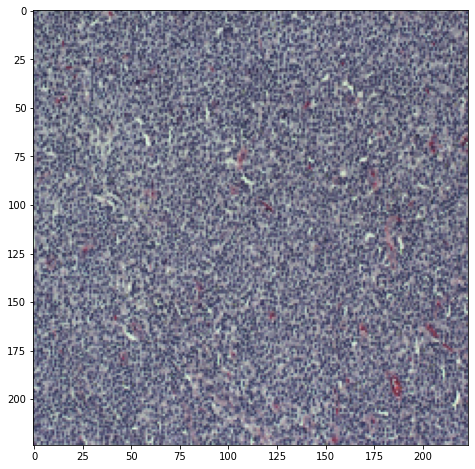

In [ ]:
im=image.load_img('/content/Leukemia/CLL/sj-03-2810_009.jpg',target_size=(224,224))
predict_image(im)


----------------------------Leukemia Images--------------------------------

------------------------------------THE Given Image is----------------------------------------------------

Chronic lymphocytic leukemia


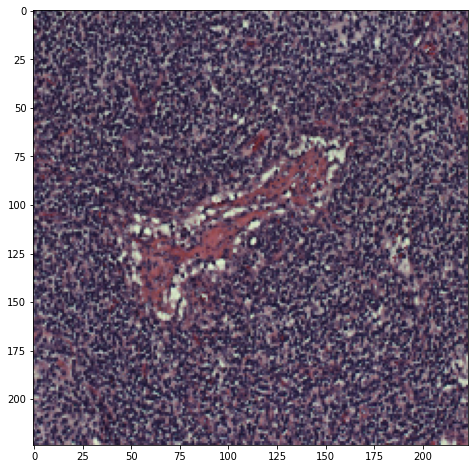

In [ ]:
im2=image.load_img('/content/Leukemia/FL/sj-05-1881-R1_013.jpg',target_size=(224,224))
predict_image(im2)


----------------------------Leukemia Images--------------------------------

------------------------------------THE Given Image is----------------------------------------------------

Chronic lymphocytic leukemia


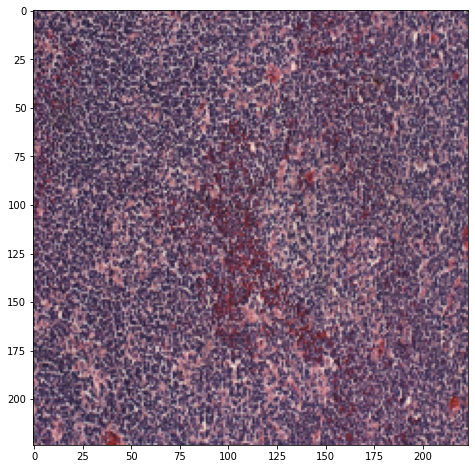

In [ ]:
im3=image.load_img('/content/Leukemia/MCL/sj-04-4525-R4_011.jpg',target_size=(224,224))
predict_image(im3)